In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import DeviceCollector
from ophyd_async.epics.signal import epics_signal_r, epics_signal_rw
from ophyd_async.core.signal import observe_value, wait_for_value
from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from p99_bluesky.plans.fast_scan import fast_scan_1d, fast_scan_grid
from p99_bluesky.plans.stxm import stxm_fast,get_velocity_and_step_size
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import noisy_det as det
bec = BestEffortCallback()
RE = RunEngine({})
from databroker import Broker
db = Broker.named('temp')
RE.subscribe(db.insert)
with DeviceCollector(mock=False):
    mock_sampleAngleStage = SampleAngleStage(
        "p99-MO-TABLE-01:", name="mock_sampleAngleStage"
    )
    mock_filter_wheel = FilterMotor(
        "p99-MO-STAGE-02:MP:SELECT", name="mock_filter_wheel"
    )
    xyz_motor = SoftThreeAxisStage("p99-MO-STAGE-02:", name="xyz_motor")

NotConnected: 
mock_sampleAngleStage: NotConnected:
    theta: NotConnected:
        read_pv: NotConnected: ca://p99-MO-TABLE-01:WRITETHETA:RBV
        write_pv: NotConnected: ca://p99-MO-TABLE-01:WRITETHETA
    roll: NotConnected:
        read_pv: NotConnected: ca://p99-MO-TABLE-01:WRITEROLL:RBV
        write_pv: NotConnected: ca://p99-MO-TABLE-01:WRITEROLL
    pitch: NotConnected:
        read_pv: NotConnected: ca://p99-MO-TABLE-01:WRITEPITCH:RBV
        write_pv: NotConnected: ca://p99-MO-TABLE-01:WRITEPITCH
mock_filter_wheel: NotConnected:
    user_setpoint: NotConnected: ca://p99-MO-STAGE-02:MP:SELECT
xyz_motor: NotConnected:
    x: NotConnected:
        motor_egu: NotConnected: ca://p99-MO-STAGE-02:X.EGU
        velocity: NotConnected: ca://p99-MO-STAGE-02:XVELO
        user_readback: NotConnected: ca://p99-MO-STAGE-02:XRBV
        user_setpoint: NotConnected: ca://p99-MO-STAGE-02:XVAL
        max_velocity: NotConnected: ca://p99-MO-STAGE-02:XVMAX
        acceleration_time: NotConnected: ca://p99-MO-STAGE-02:XACCL
        precision: NotConnected: ca://p99-MO-STAGE-02:X.PREC
        deadband: NotConnected: ca://p99-MO-STAGE-02:XRDBD
        motor_done_move: NotConnected: ca://p99-MO-STAGE-02:XDMOV
        low_limit_travel: NotConnected: ca://p99-MO-STAGE-02:XLLM
        high_limit_travel: NotConnected: ca://p99-MO-STAGE-02:XHLM
        motor_stop: NotConnected: ca://p99-MO-STAGE-02:XSTOP
    y: NotConnected:
        motor_egu: NotConnected: ca://p99-MO-STAGE-02:Y.EGU
        velocity: NotConnected: ca://p99-MO-STAGE-02:YVELO
        user_readback: NotConnected: ca://p99-MO-STAGE-02:YRBV
        user_setpoint: NotConnected: ca://p99-MO-STAGE-02:YVAL
        max_velocity: NotConnected: ca://p99-MO-STAGE-02:YVMAX
        acceleration_time: NotConnected: ca://p99-MO-STAGE-02:YACCL
        precision: NotConnected: ca://p99-MO-STAGE-02:Y.PREC
        deadband: NotConnected: ca://p99-MO-STAGE-02:YRDBD
        motor_done_move: NotConnected: ca://p99-MO-STAGE-02:YDMOV
        low_limit_travel: NotConnected: ca://p99-MO-STAGE-02:YLLM
        high_limit_travel: NotConnected: ca://p99-MO-STAGE-02:YHLM
        motor_stop: NotConnected: ca://p99-MO-STAGE-02:YSTOP
    z: NotConnected:
        motor_egu: NotConnected: ca://p99-MO-STAGE-02:Z.EGU
        velocity: NotConnected: ca://p99-MO-STAGE-02:ZVELO
        user_readback: NotConnected: ca://p99-MO-STAGE-02:ZRBV
        user_setpoint: NotConnected: ca://p99-MO-STAGE-02:ZVAL
        max_velocity: NotConnected: ca://p99-MO-STAGE-02:ZVMAX
        acceleration_time: NotConnected: ca://p99-MO-STAGE-02:ZACCL
        precision: NotConnected: ca://p99-MO-STAGE-02:Z.PREC
        deadband: NotConnected: ca://p99-MO-STAGE-02:ZRDBD
        motor_done_move: NotConnected: ca://p99-MO-STAGE-02:ZDMOV
        low_limit_travel: NotConnected: ca://p99-MO-STAGE-02:ZLLM
        high_limit_travel: NotConnected: ca://p99-MO-STAGE-02:ZHLM
        motor_stop: NotConnected: ca://p99-MO-STAGE-02:ZSTOP


2024-07-03 15:38:34,668 - P99 - INFO - 0.44000000000000006 velocity = 0.8800000000000001.
2024-07-03 15:38:34,668 - P99 - INFO - xyz_motor-x velocity = 0.8800000000000001.
2024-07-03 15:38:34,669 - P99 - INFO - xyz_motor-y step size = 0.44000000000000006.


Transient Scan ID: 2     Time: 2024-07-03 15:38:34
Persistent Unique Scan ID: '33be3a82-e337-4c8a-b377-41bf4ca9187c'
2024-07-03 15:38:34,671 - P99 - INFO - Check xyz_motor-y limits.
2024-07-03 15:38:34,672 - P99 - INFO - Check xyz_motor-x limits.
2024-07-03 15:38:36,209 - P99 - INFO - Moving xyz_motor-x to start position = -2.2.
2024-07-03 15:38:36,219 - P99 - INFO - Set xyz_motor-x speed = 0.8800000000000001.
2024-07-03 15:38:36,220 - P99 - INFO - Set xyz_motor-x to end position(2.2) and begin scan.
New stream: 'primary'
+-----------+------------+------------+-------------+-------------+
|   seq_num |       time |  noisy_det | xyz_motor-y | xyz_motor-x |
+-----------+------------+------------+-------------+-------------+
|         

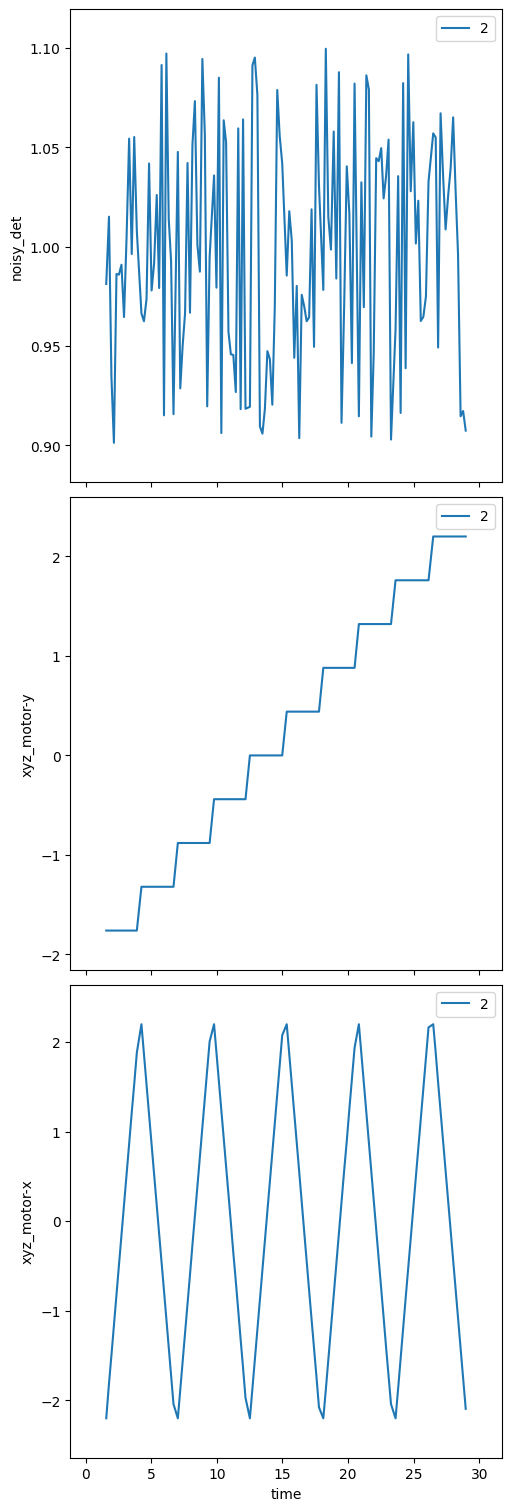

In [19]:
uid, = RE(stxm_fast(
    det=det,
    count_time = 0.5,
    scan_motor = xyz_motor.x,
    scan_start = -2.2,
    scan_end   = 2.2,
    step_motor = xyz_motor.y,
    step_start = -2.2,
    step_end   = 2.2,
    plan_time  = 50,
),bec)

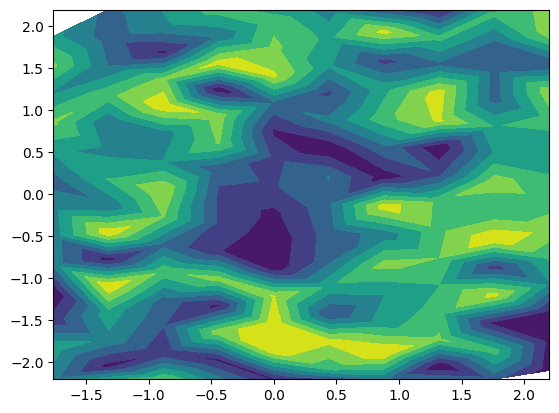

CA.Client.Exception...............................................
    Context: "host.containers.internal:5064"
    Source File: modules/ca/src/client/cac.cpp line 1237
    Current Time: Wed Jul 03 2024 15:51:33.491127279
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XLLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jul 03 2024 15:56:49.733635751
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XSTOP", Connecting to: host.containers.internal:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jul 03 2024 15:56:49.733642594
.......................................................

In [20]:
header = db[-1]
data = header.table()
plt.tricontourf(data["xyz_motor-y"],data["xyz_motor-x"],data['noisy_det'])

In [10]:
import matplotlib.pyplot as plt

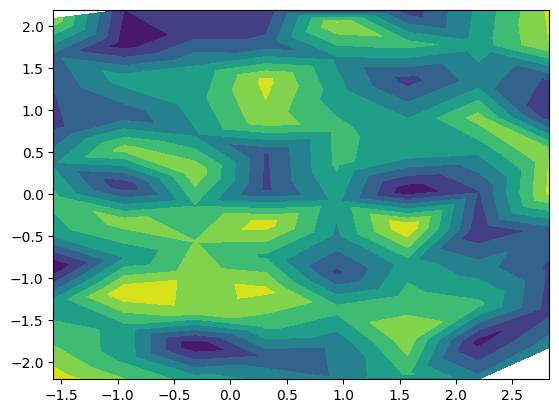

In [ ]:
k = RE(get_velocity_and_step_size(xyz_motor.x, 20, 0.1))

In [ ]:
RE.abort() 

In [ ]:
RE(fast_scan_grid([det],xyz_motor.x,-2,2,10, xyz_motor.y,-0,-10,1),bec)

In [ ]:
RE(fast_scan_grid([det],xyz_motor.x,0,10,10, xyz_motor.y,-0,-10,5,snake_axes = True),bec)

In [ ]:
RE(fast_scan([det],xyz_motor.x,-8.888,18880,5
            ))

In [ ]:
import bluesky.plan_patterns as bpp
import bluesky.plan_stubs as bps
from bluesky.simulators import check_limits
from ophyd_async.epics.motion import Motor
from ophyd_async.protocols import AsyncReadable
import asyncio
from typing import Optional


In [ ]:
def plan(motor):
    y = yield from bps.read(motor.x)
    print(y)

In [ ]:
RE(bps.abs_set(xyz_motor.y.velocity,100))
   

In [ ]:
RE(bps.abs_set(xyz_motor.x.velocity,100))

In [ ]:
def set_and_count(det,motor,end):
    yield from bps.abs_set(xyz_motor.x,end) 
    current_value = yield from bps.rd(motor.user_readback)
    while abs(end - current_value) > 1e-7:
        yield from count(det+[motor], num=1)
        current_value = yield from bps.rd(motor.user_readback)

In [ ]:
from ophyd.sim import det, det1, motor1
from bluesky.plans import count
from bluesky.preprocessors import monitor_during_wrapper

# Record any updates from det1 while 'counting' det 5 times.
RE(set_and_count([det],xyz_motor.x,7),bec)

In [ ]:
a = [1,2,3,4]
b = 5

In [ ]:
c = a,b

In [ ]:
c

In [ ]:
from bluesky.plans import grid_scan
from ophyd.sim import det5, jittery_motor1, jittery_motor2
from bluesky.callbacks.mpl_plotting import LiveScatter

# The 'jittery' example motors won't go exactly where they are told to go.

RE(grid_scan([det5],
                      jittery_motor1, -3, 3, 6,
                      jittery_motor2, -5, 5, 10, False),
   LiveScatter('jittery_motor1', 'jittery_motor2', 'det5',
            xlim=(-3, 3), ylim=(-5, 5)))

In [ ]:
def test(count_time: float,
    scan_range: float,
    step_range: float,
    plan_time :float,):
    num_data_point = plan_time/count_time
    step_size = 1.0/(num_data_point/(scan_range*step_range))**0.5
    ideal_velocity = step_size/count_time
    #smallest_possible_step_size = scan_motor.max_velocity

    print(ideal_velocity,step_size)

In [ ]:
test(0.1,10,2,100)

In [ ]:
(100/0.1/20)**0.5

In [ ]:
(7.07*2) *(7.07*10)
